# Multiple Linear Regression

## Car dataset

In [3]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# data visualization
%matplotlib inline

In [5]:
# filtering of warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# loading the data
cars = pd.read_csv("/home/shashanksoni092/DataScienceWorkspace/DataScienceProjectsPdf/MultipleLinearRegression/python/Cars.csv")

In [7]:
# checking format of the dataset
type(cars)

pandas.core.frame.DataFrame

In [8]:
# to get top 5 rows
cars.head(3) # to get top n rows use cars.head(10)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597


In [9]:
cars.shape # to see the dimension of dataset

(81, 5)

In [10]:
cars.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [11]:
# Correlation matrix 
cars.corr() 
# we see there exists High collinearity between input variables especially between
# [Hp & SP] , [VOL,WT] so there exists collinearity problem

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [12]:
type(cars)

pandas.core.frame.DataFrame

In [13]:
# Scatter plot between the variables along with histograms
import seaborn as sns

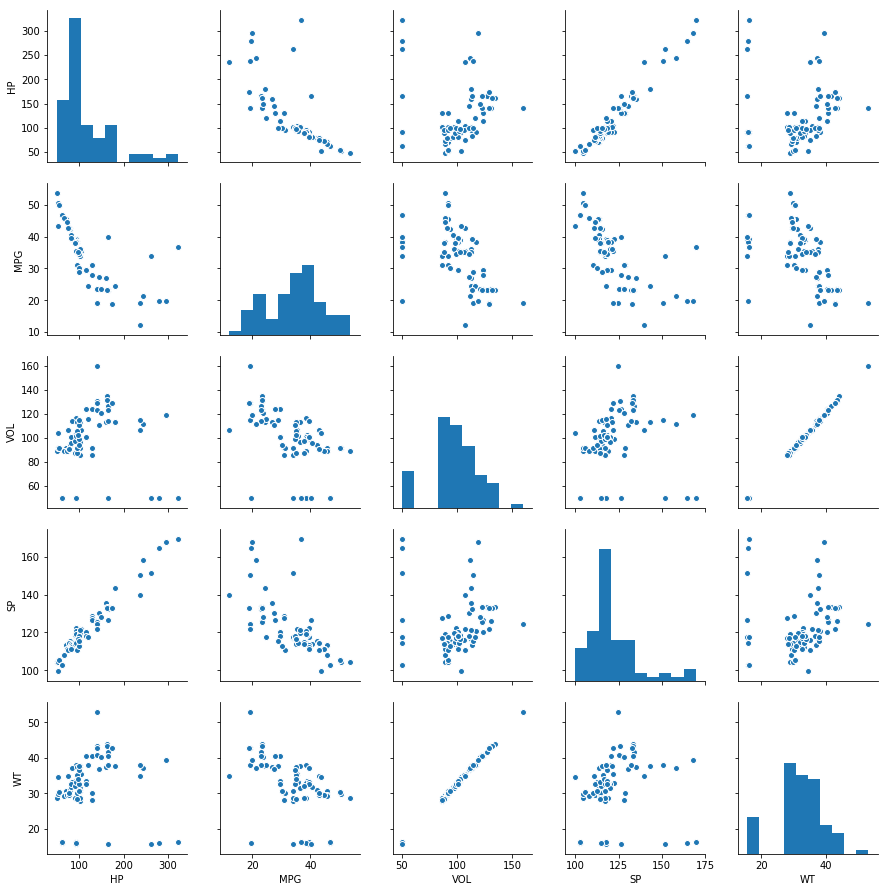

In [14]:
# pairplot
sns.pairplot(cars.iloc[:,:10])

In [15]:
# columns names
cars.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [16]:
# pd.tools.plotting.scatter_matrix(cars); -> also used for plotting all in one graph

In [17]:
    # preparing model considering all the variables 
    import statsmodels.formula.api as smf # for regression model

In [18]:
# Preparing model                  
ml1 = smf.ols('MPG ~ WT + VOL + SP + HP',data=cars).fit() # regression model

In [19]:
# Getting coefficients of variables               
ml1.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [20]:
# Summary
ml1.summary()
# p-values for WT,VOL are more than 0.05 and also we know that [WT,VOL] has high correlation value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           1.54e-23
Time:                        02:16:46   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# preparing model based only on Volume
ml_v=smf.ols('MPG ~ VOL',data = cars).fit()  
ml_v.summary() # 0.271
# p-value <0.05 .. It is significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           3.82e-07
Time:                        02:16:46   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Preparing model based only on WT
ml_w=smf.ols('MPG ~ WT',data = cars).fit()  
ml_w.summary() # 0.268

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           4.38e-07
Time:                        02:16:46   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Preparing model based only on WT & VOL
ml_wv=smf.ols('MPG ~ WT + VOL',data = cars).fit()  
ml_wv.summary() # 0.264

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           2.43e-06
Time:                        02:16:46   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Both coefficients p-value became insignificant... 
# So there may be a chance of considering only one among VOL & WT

In [25]:
# Checking whether data has any influential values 
# influence index plots

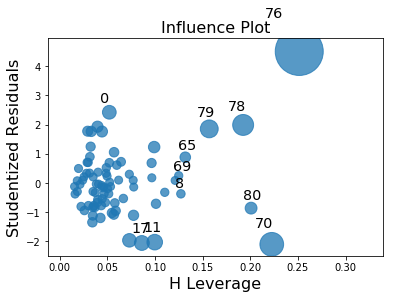

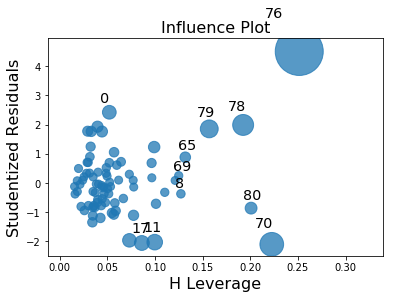

In [26]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)
# index 76 AND 78 is showing high influence so we can exclude that entire row

In [27]:
# Studentized Residuals = Residual/standard deviation of residuals

In [28]:
# dropping influential records
cars_new = cars.drop(cars.index[[76,70]],axis=0) # ,inplace=False)

In [29]:
type(cars_new)
cars_new.shape
cars.shape

(81, 5)

In [30]:
# Preparing model                  
ml_new = smf.ols('MPG ~ WT + VOL + HP + SP',data = cars_new).fit()

In [31]:
# Getting coefficients of variables        
ml_new.params

Intercept    25.262686
WT           -0.130515
VOL          -0.138784
HP           -0.229533
SP            0.443356
dtype: float64

In [32]:
# Summary
ml_new.summary() # 0.806

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     82.15
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           1.89e-26
Time:                        02:16:49   Log-Likelihood:                -219.05
No. Observations:                  79   AIC:                             448.1
Df Residuals:                      74   BIC:                             460.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2627     13.495      1.872      0.065      -1.627      52.152
WT            -0.1305      1.519     -0.086      0.932      -3.158       2.897
VOL           -0.1388      0.510     -0.272      0.786      -1.155       0.877
HP            -0.2295      0.035     -6.489      0.000      -0.300      -0.159
SP             0.4434      0.144      3.081      0.003       0.157       0.730
==============================================================================
Omnibus:                        6.476   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.764
Skew:                           0.617   Prob(JB):                       0.0560
Kurtosis:                       3.479   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# Confidence values 99%
print(ml_new.conf_int(0.01)) # 99% confidence level

                   0          1
Intercept -10.416762  60.942135
WT         -4.147683   3.886654
VOL        -1.486618   1.209049
HP         -0.323055  -0.136010
SP          0.062873   0.823838


In [34]:
# Predicted values of MPG 
mpg_pred = ml_new.predict(cars_new)
mpg_pred

0     44.101073
1     42.650709
2     42.686370
3     42.732995
4     42.741815
5     43.162802
6     42.671376
7     47.511716
8     47.444929
9     41.090769
10    41.617306
11    47.288373
12    40.259347
13    41.615336
14    41.896063
15    41.585828
16    41.581186
17    47.230870
18    41.529814
19    38.461152
20    38.993094
21    38.013214
22    38.506000
23    39.658830
24    40.190345
25    45.920504
26    36.480017
27    38.926477
28    38.535513
29    36.150004
        ...    
49    32.926491
50    32.958405
51    32.929332
52    29.766554
53    26.928075
54    28.019688
55    28.958784
56    35.498325
57    33.020978
58    35.209842
59    32.675195
60    29.489715
61    28.847465
62    25.168349
63    26.300654
64    25.604939
65    34.528007
66    25.349252
67    23.606064
68    24.141918
69    18.819315
71    22.748887
72    23.129056
73    19.298843
74    23.691739
75    20.514193
77    16.483189
78    23.110302
79    10.349075
80    13.680984
Length: 79, dtype: float

In [35]:
# view top 5 records in a dataset
cars_new.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [36]:
rsq_hp = smf.ols('HP ~ WT + VOL + SP',data=cars).fit()
rsq_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     485.8
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           6.46e-50
Time:                        02:16:50   Log-Likelihood:                -320.90
No. Observations:                  81   AIC:                             649.8
Df Residuals:                      77   BIC:                             659.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -359.1891     14.118    -25.443      0.000    -387.301    -331.077
WT            -5.8704      4.875     -1.204      0.232     -15.579       3.838
VOL            1.9137      1.638      1.168      0.246      -1.348       5.175
SP             3.9323      0.103     38.045      0.000       3.726       4.138
==============================================================================
Omnibus:                        6.998   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.483
Skew:                           0.564   Prob(JB):                       0.0391
Kurtosis:                       3.805   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# calculating VIF's values of independent variables
rsq_hp = smf.ols('HP ~ WT + VOL + SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33
vif_hp

19.92658897499852

In [38]:
rsq_wt = smf.ols('WT ~ HP + VOL + SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98
vif_wt

639.5338175572624

In [39]:
rsq_vol = smf.ols('VOL ~ WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84
vif_vol

638.8060836592878

In [40]:
rsq_sp = smf.ols('SP ~WT+VOL+HP',data=cars_new).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35
vif_sp

15.29051089081452

In [41]:
# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As weight is having higher VIF value, we are not going to include this prediction model

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,15.290511


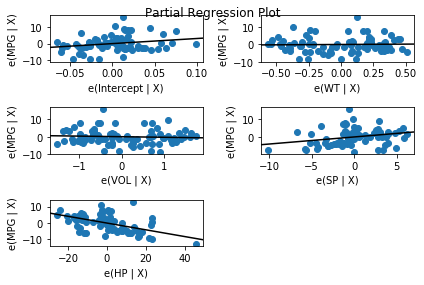

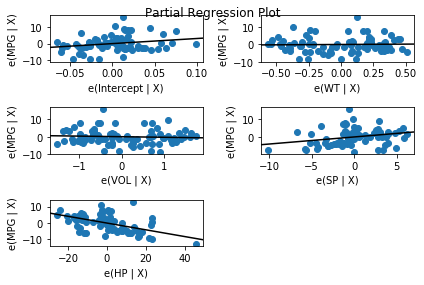

In [42]:
        # Added varible plot 
        sm.graphics.plot_partregress_grid(ml1)

In [43]:
# added varible plot for weight is not showing any significance 

In [44]:
# final model
final_ml= smf.ols('MPG ~ VOL + SP + HP',data = cars).fit()
final_ml.params

Intercept    29.923389
VOL          -0.201651
SP            0.400659
HP           -0.206705
dtype: float64

In [45]:
# final model summary
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 06 Oct 2018   Prob (F-statistic):           1.56e-24
Time:                        02:16:51   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# As we can see that r-squared value has increased from 0.810 to 0.812.

In [47]:
# prediction using final model
mpg_pred = final_ml.predict(cars)
mpg_pred

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
5     42.855903
6     42.256794
7     48.132206
8     48.132206
9     40.766164
10    41.434470
11    47.940953
12    39.865652
13    41.434470
14    41.679426
15    41.434470
16    41.273320
17    47.940953
18    41.273320
19    38.017216
20    38.663674
21    37.460010
22    38.114615
23    39.428536
24    40.092240
25    46.738975
26    35.697237
27    38.663674
28    38.094668
29    35.872824
        ...    
51    33.179201
52    29.388754
53    27.381591
54    28.310411
55    28.692138
56    35.785195
57    33.179201
58    35.430090
59    32.369906
60    29.737290
61    28.872328
62    25.070817
63    26.389233
64    25.853768
65    36.457439
66    25.910107
67    23.767681
68    24.426889
69    20.120473
70    27.911446
71    22.668719
72    23.163125
73    18.688920
74    23.797784
75    20.970369
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float

In [48]:
import statsmodels.api as sm

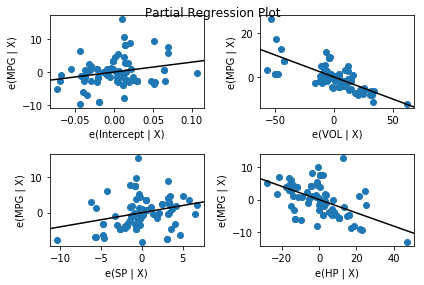

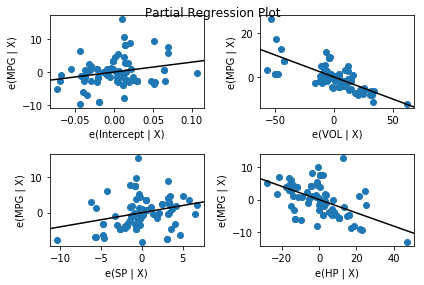

In [49]:
# added variable plot for the final model
sm.graphics.plot_partregress_grid(final_ml)

ValueError: x and y must be the same size

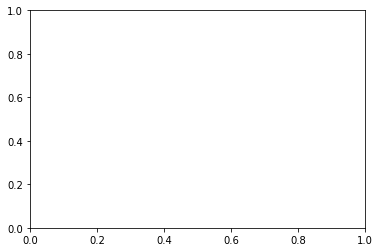

In [51]:
######  Linearity #########
# Observed values VS Fitted values
plt.scatter(cars_new.MPG,mpg_pred,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")
plt.show()

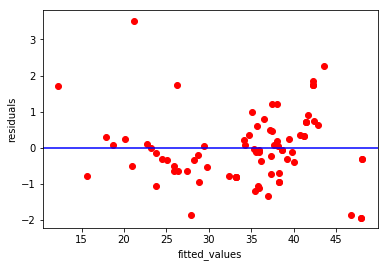

In [52]:
# Residuals VS Fitted Values 
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [ ]:
########    Normality plot for residuals ######
# histogram
plt.hist(final_ml.resid_pearson) # Checking the standardized residuals are normally distributed
plt.show()

In [ ]:
# QQ plot for residuals 
import pylab          
import scipy.stats as st

In [ ]:
# Checking Residuals are normally distributed
st.probplot(final_ml.resid_pearson, dist="norm", plot=pylab)
plt.show()

In [ ]:
############ Homoscedasticity #######

# Residuals VS Fitted Values 
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [ ]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
cars_train, cars_test  = train_test_split(cars_new,test_size = 0.2) # 20% size

In [ ]:
# preparing the model on train data 

model_train = smf.ols("MPG~HP+SP+VOL",data=cars_train).fit()

In [ ]:
# train_data prediction
train_pred = model_train.predict(cars_train)

In [ ]:
# train residual values 
train_resid  = train_pred - cars_train.MPG

In [ ]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))

In [ ]:
# prediction on test data set 
test_pred = model_train.predict(cars_test)

In [ ]:
# test residual values 
test_resid  = test_pred - cars_test.MPG

In [ ]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))